# CƠ BẢN VỀ PYTORCH

### Sử dụng GPU và Cuda

In [1]:
import torch
torch.cuda.current_device

<function torch.cuda.current_device() -> int>

In [3]:
torch.cuda.current_device(0)

TypeError: current_device() takes 0 positional arguments but 1 was given

In [4]:
#Trả về mức sử dụng bộ nhớ GPU hiện tại theo tensors tính bằng bytes cho thiết bị.
torch.cuda.memory_allocated()

0

In [4]:
#Trả về bộ nhớ GPU hiện tại được quản lý bởi bộ phân bố bộ nhớ đệm theo byte
torch.cuda.memory_reserved()


0

### Dataset with pytorch

In [5]:
#Loading data iris
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
X = df.drop(["Species"], axis = 1).values
y = le.fit_transform(df["Species"].values)

#Chia dữ liệu với test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = torch.FloatTensor(X_train) 
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)
print(f"train size {len(y_train)}") 




train size 120


In [15]:
labels, counts = y_train.unique(return_counts=True)
print(labels, counts)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [16]:
#Tính đạo hàm bằng Pytorch 
#Cho y = 2x^4 + x^3 + 3x^2 + 5x + 1
#Tính y'
import torch
#Tạo 1 tensor với requirments_grad được đặt thành True
x = torch.tensor(2.0, requires_grad=True)
print(x)
print (x.grad)


tensor(2., requires_grad=True)
None


In [17]:
#Định nghĩa hàm 
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y) 
#Tại sao ra 63?
#Vì x = 2


tensor(63., grad_fn=<AddBackward0>)


In [18]:
y.grad_fn

In [19]:
#Thực hiện truyền ngược và tính toán tất cả các gradient
y.backward()

In [20]:
#Kết quả đạo hàm
x.grad

tensor(93.)

In [26]:
import torch

# Bài tập 
# Tính y = 5x^6 + 3x^3 + 2x^1 + x + 2x + 5x^4 + 1
# Cho biết độ dốc của đa thức trên tại điểm nào.
x = torch.tensor(2.0, requires_grad=True)
y = 5*x**6 + 3*x**3 + 2*x + x + 2*x + 5*x**4 + 1  # Chỉnh sửa công thức để đúng với đề bài
print(f"Giá trị của y: {y.item()}")

# Tính gradient
y.backward()
print(f"Độ dốc của đa thức tại x = 2: {x.grad.item()}")

Giá trị của y: 435.0
Độ dốc của đa thức tại x = 2: 1161.0


In [5]:
#Bài tập về nhà số 1
import torch

# Bước 1: Tạo tensor x có giá trị ban đầu là 2.0 và yêu cầu PyTorch theo dõi gradient
x = torch.tensor(2.0, requires_grad=True)
print(f'Giá trị ban đầu của x: {x.item()}')

# Bước 2: Định nghĩa hàm số y = x^3 + 2x^2 + 5x + 1
def function(x):
    return x**3 + 2*x**2 + 5*x + 1

# Bước 3: Tính giá trị của hàm số tại x = 2.0
y = function(x)
print(f'Giá trị của hàm số tại x = {x.item()}: {y.item()}')

# Bước 4: Tính gradient dy/dx tại x = 2.0
y.backward()
gradient = x.grad
print(f'Gradient dy/dx tại x = {x.item()}: {gradient.item()}')

# Bước 5: Thực hiện Gradient Descent với learning rate alpha = 0.1 trong 10 vòng lặp
learning_rate = 0.1
iterations = 10

# Reset giá trị x và gradient
x = torch.tensor(2.0, requires_grad=True)

print("\nQuá trình Gradient Descent:")
print(f'Vòng lặp 0: x = {x.item()}, f(x) = {function(x).item()}')

for i in range(iterations):
    # Tính giá trị hàm số
    y = function(x)
    
    # Tính gradient
    if x.grad is not None:
        x.grad.zero_()
    y.backward()
    
    # Cập nhật giá trị x: x_new = x_old - alpha * gradient
    with torch.no_grad():
        x -= learning_rate * x.grad
    
    # In kết quả mỗi vòng lặp
    print(f'Vòng lặp {i+1}: x = {x.item()}, f(x) = {function(x).item()}, gradient = {x.grad.item()}')


Giá trị ban đầu của x: 2.0
Giá trị của hàm số tại x = 2.0: 27.0
Gradient dy/dx tại x = 2.0: 25.0

Quá trình Gradient Descent:
Vòng lặp 0: x = 2.0, f(x) = 27.0
Vòng lặp 1: x = -0.5, f(x) = -1.125, gradient = 25.0
Vòng lặp 2: x = -0.875, f(x) = -2.513671875, gradient = 3.75
Vòng lặp 3: x = -1.2546875476837158, f(x) = -4.1001362800598145, gradient = 3.796875
Vòng lặp 4: x = -1.7250847816467285, f(x) = -6.807298183441162, gradient = 4.703972339630127
Vòng lặp 5: x = -2.427826166152954, f(x) = -13.660883903503418, gradient = 7.027413368225098
Vòng lặp 6: x = -3.7249975204467773, f(x) = -41.56037521362305, gradient = 12.971714973449707
Vòng lặp 7: x = -6.897680282592773, f(x) = -266.51019287109375, gradient = 31.726829528808594
Vòng lặp 8: x = -18.912006378173828, f(x) = -6142.375, gradient = 120.14325714111328
Vòng lặp 9: x = -119.14640808105469, f(x) = -1663589.5, gradient = 1002.3439331054688
Vòng lặp 10: x = -4330.74755859375, f(x) = -81187307520.0, gradient = 42116.01171875


In [ ]:
#Bài tập về nhà số 2
#Tạo 1 tập dữ liệu giả với x là số giờ học (ngẫu nhiên từ 1 -10) và y là số điểm được tính y = 3x +5 + noise
#Với noise là 1 giá trị ngẫu nhiên nhỏ
#1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad = True
#2. Tính MSE
#3. Tính gradient
#4. Cập nhật tham số w và b bằng gradient Descent với Learning rate alpha = 0.01
#5. Lập lại quá trình trên trong 100 vòng lập và quan sát sự hội tụ của mô hình

Dữ liệu x có shape: torch.Size([100, 1])
Dữ liệu y có shape: torch.Size([100, 1])
5 mẫu đầu tiên của x: [4.370861053466797, 9.556428909301758, 7.587945461273193, 6.3879265785217285, 2.404167652130127]
5 mẫu đầu tiên của y: [18.199630737304688, 33.37028121948242, 27.8555965423584, 22.176212310791016, 11.992831230163574]

Giá trị khởi tạo: w = 0.33669036626815796, b = 0.12880940735340118
Giá trị thực: w = 3, b = 5

Bắt đầu quá trình huấn luyện:
Epoch 10/100, Loss: 4.9131, w: 3.6279, b: 0.8186
Epoch 20/100, Loss: 4.5948, w: 3.6011, b: 0.9944
Epoch 30/100, Loss: 4.3013, w: 3.5753, b: 1.1633
Epoch 40/100, Loss: 4.0305, w: 3.5506, b: 1.3254
Epoch 50/100, Loss: 3.7807, w: 3.5268, b: 1.4812
Epoch 60/100, Loss: 3.5502, w: 3.5040, b: 1.6308
Epoch 70/100, Loss: 3.3376, w: 3.4820, b: 1.7745
Epoch 80/100, Loss: 3.1415, w: 3.4609, b: 1.9125
Epoch 90/100, Loss: 2.9605, w: 3.4407, b: 2.0451
Epoch 100/100, Loss: 2.7936, w: 3.4213, b: 2.1724

Kết quả cuối cùng sau 100 vòng lặp:
w = 3.4213 (giá trị thực:

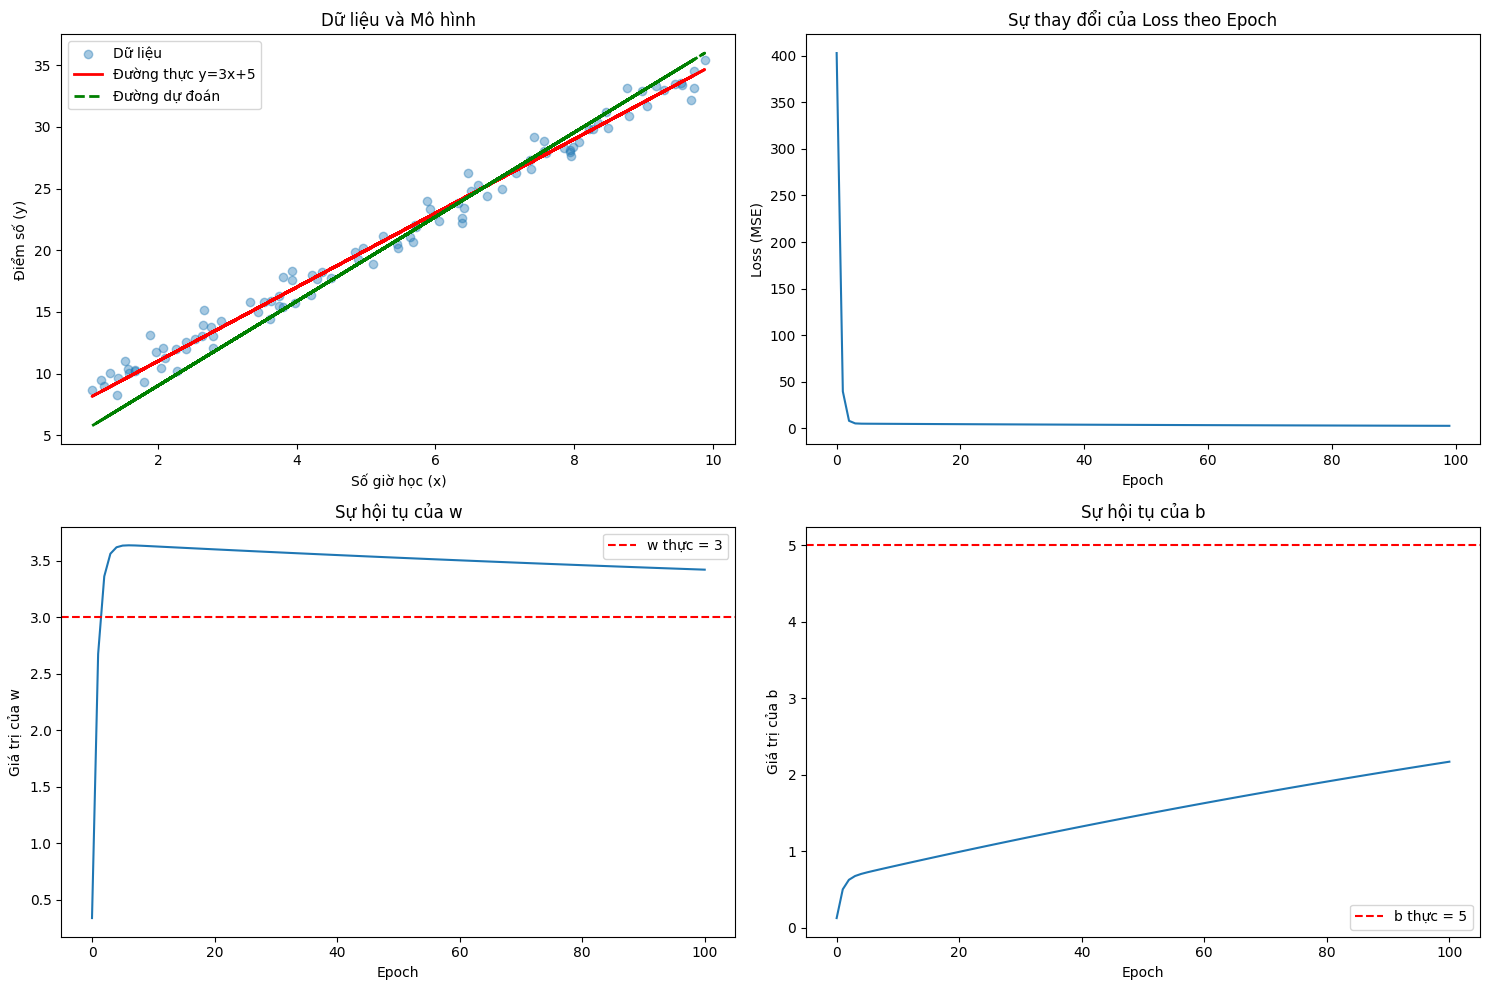

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Đặt seed cho tính tái tạo (reproducibility)
torch.manual_seed(42)
np.random.seed(42)

# 1. Tạo tập dữ liệu giả
# x: số giờ học (ngẫu nhiên từ 1-10)
# y: điểm số, được tính bằng y = 3x + 5 + noise
n_samples = 100
x = torch.FloatTensor(np.random.uniform(1, 10, size=(n_samples, 1)))
noise = torch.FloatTensor(np.random.normal(0, 1, size=(n_samples, 1)))
y_true = 3 * x + 5
y = y_true + noise

print(f"Dữ liệu x có shape: {x.shape}")
print(f"Dữ liệu y có shape: {y.shape}")
print(f"5 mẫu đầu tiên của x: {x[:5].flatten().tolist()}")
print(f"5 mẫu đầu tiên của y: {y[:5].flatten().tolist()}")

# 1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad = True
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"\nGiá trị khởi tạo: w = {w.item()}, b = {b.item()}")
print(f"Giá trị thực: w = 3, b = 5")

# Định nghĩa hàm dự đoán và hàm mất mát
def predict(x, w, b):
    return x * w + b

def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Thiết lập learning rate và số vòng lặp
learning_rate = 0.01
n_epochs = 100

# Lưu lại lịch sử để vẽ đồ thị
w_history = [w.item()]
b_history = [b.item()]
loss_history = []

# Vòng lặp Gradient Descent
print("\nBắt đầu quá trình huấn luyện:")
for epoch in range(n_epochs):
    # 2. Tính giá trị dự đoán và MSE
    y_pred = predict(x, w, b)
    loss = mse_loss(y_pred, y)
    loss_history.append(loss.item())
    
    # 3. Tính gradient
    loss.backward()
    
    # 4. Cập nhật tham số w và b bằng Gradient Descent
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    # Lưu lại giá trị của w và b sau mỗi vòng lặp
    w_history.append(w.item())
    b_history.append(b.item())
    
    # Reset gradient
    w.grad.zero_()
    b.grad.zero_()
    
    # In kết quả mỗi 10 vòng lặp
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}")

print(f"\nKết quả cuối cùng sau {n_epochs} vòng lặp:")
print(f"w = {w.item():.4f} (giá trị thực: 3)")
print(f"b = {b.item():.4f} (giá trị thực: 5)")
print(f"Loss cuối cùng: {loss_history[-1]:.4f}")

# 5. Vẽ đồ thị sự hội tụ của mô hình
plt.figure(figsize=(15, 10))

# Vẽ dữ liệu và đường hồi quy
plt.subplot(2, 2, 1)
plt.scatter(x.numpy(), y.numpy(), alpha=0.4, label='Dữ liệu')
plt.plot(x.numpy(), y_true.numpy(), 'r', linewidth=2, label='Đường thực y=3x+5')
plt.plot(x.numpy(), predict(x, w, b).detach().numpy(), 'g--', linewidth=2, label='Đường dự đoán')
plt.xlabel('Số giờ học (x)')
plt.ylabel('Điểm số (y)')
plt.legend()
plt.title('Dữ liệu và Mô hình')

# Vẽ sự thay đổi của loss
plt.subplot(2, 2, 2)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Sự thay đổi của Loss theo Epoch')

# Vẽ sự thay đổi của w
plt.subplot(2, 2, 3)
plt.plot(w_history)
plt.axhline(y=3, color='r', linestyle='--', label='w thực = 3')
plt.xlabel('Epoch')
plt.ylabel('Giá trị của w')
plt.legend()
plt.title('Sự hội tụ của w')

# Vẽ sự thay đổi của b
plt.subplot(2, 2, 4)
plt.plot(b_history)
plt.axhline(y=5, color='r', linestyle='--', label='b thực = 5')
plt.xlabel('Epoch')
plt.ylabel('Giá trị của b')
plt.legend()
plt.title('Sự hội tụ của b')

plt.tight_layout()
plt.savefig('linear_regression_convergence.png')  # Lưu hình để xem
print("\nĐồ thị hội tụ đã được lưu vào file 'linear_regression_convergence.png'")

In [27]:
#Pytorch with tensor 
import torch 
import numpy as np

torch.__version__

'2.6.0+cpu'

In [28]:
#Chuyển đổi mảng numpy sang tensor pytorch
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [29]:
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [30]:
print(x.dtype) 

torch.int64


In [32]:
print(x.type())

torch.LongTensor


In [33]:
arr2 = np.arange(0.,12.).reshape(4,3)
arr2 

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [34]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [35]:
arr = np.arange(0,5)
x = torch.from_numpy(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [36]:
arr[0] = 99
print(x)

tensor([99,  1,  2,  3,  4])


In [ ]:
#Bài tập về nhà số 3
#Giải thích lý do tại sao cho 2 trường hợp ở trên

In [ ]:
#Bài tập về nhà số 4
#bạn hãy giúp thầy về nhà tạo tensor với:
#Empyty
#Zeros
#Ones
#Random
#Reshape với view và view as 

In [ ]:
#Dealine 166/03